<a href="https://colab.research.google.com/github/sid-0837/siddharth/blob/main/knnppt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
data = pd.read_csv('/content/shopping_trends.csv')

In [4]:
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [5]:
bins = [0, 50, 150, np.inf]  # Define the bins (Low, Medium, High)
labels = ['Low', 'Medium', 'High']
data['Purchase Category'] = pd.cut(data['Purchase Amount (USD)'], bins=bins, labels=labels)

In [6]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Encode Gender as 0 and 1
data['Item Purchased'] = label_encoder.fit_transform(data['Item Purchased'])
data['Category'] = label_encoder.fit_transform(data['Category'])
data['Purchase Category'] = label_encoder.fit_transform(data['Purchase Category'])

In [11]:
X = data[['Age', 'Gender', 'Item Purchased', 'Category']]
y = data['Purchase Category']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

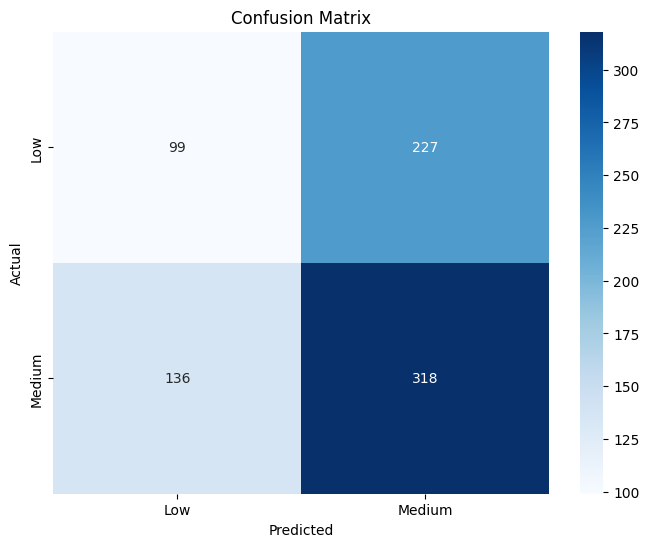

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

         Low       0.42      0.30      0.35       326
      Medium       0.58      0.70      0.64       454

    accuracy                           0.53       780
   macro avg       0.50      0.50      0.49       780
weighted avg       0.52      0.53      0.52       780

